In [1]:
# imagine a circle of radius r moving from x,y by vx,vy from t0 to t1.

# a pixel x1,y1 will be in the circle's shadow if
# there is a t, t0 < t < t1, such that
# (x1-x-vx*t)**2 + (y1-y-vy*t)**2 < r**2

# If we knew the smallest and largest t, we could find what fraction of that range overlaps the interval [t0,t1] to get a fraction of solid color.
# t[small], t[large] = solve
# (x1-x-vx*t)**2 + (y1-y-vy*t)**2 = r**2

In [3]:
from sympy import symbols, nonlinsolve, Eq

x,y,x1,y1,vx,vy,r,t = symbols('x,y,x1,y1,vx,vy,r,t')
eq1 = Eq((x1-x-vx*t)**2 + (y1-y-vy*t)**2,r**2)
sols = nonlinsolve([eq1],t)
sols

{(-(vx*x - vx*x1 + vy*y - vy*y1)/(vx**2 + vy**2) - sqrt(r**2*vx**2 + r**2*vy**2 - vx**2*y**2 + 2*vx**2*y*y1 - vx**2*y1**2 + 2*vx*vy*x*y - 2*vx*vy*x*y1 - 2*vx*vy*x1*y + 2*vx*vy*x1*y1 - vy**2*x**2 + 2*vy**2*x*x1 - vy**2*x1**2)/(vx**2 + vy**2),), (-(vx*x - vx*x1 + vy*y - vy*y1)/(vx**2 + vy**2) + sqrt(r**2*vx**2 + r**2*vy**2 - vx**2*y**2 + 2*vx**2*y*y1 - vx**2*y1**2 + 2*vx*vy*x*y - 2*vx*vy*x*y1 - 2*vx*vy*x1*y + 2*vx*vy*x1*y1 - vy**2*x**2 + 2*vy**2*x*x1 - vy**2*x1**2)/(vx**2 + vy**2),)}

In [15]:
from sympy import cse
cse(sols.subs({"x":0,"y":0,"vx":1,"vy":0,"r":1}))

([(x0, sqrt(1 - y1**2))], [{(-x0 + x1,), (x0 + x1,)}])

In [22]:
import numpy as np

def t_interval(x1,y1, ts, te):
    x0 = np.sqrt(1-y1**2)
    t0 = x1-x0
    t1 = x1+x0
    t0 = np.maximum(t0,ts)
    t1 = np.minimum(t1,te)
    return (t1-t0)/(te-ts)

C:\Users\Carl\AppData\Local\Temp\ipykernel_30184\1174630546.py:4: RuntimeWarning: invalid value encountered in sqrt
  x0 = np.sqrt(1-y1**2)


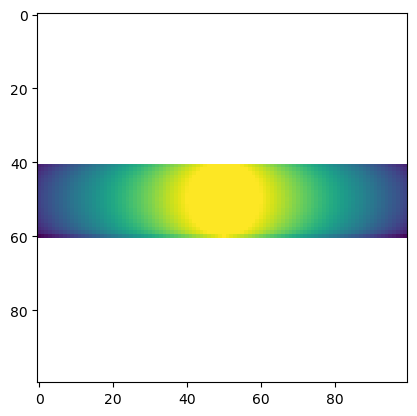

In [26]:
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
interval = t_interval(X,Y, 0, .0001)
plt.imshow(interval)

In [11]:
from mpl_toolkits import mplot3d 
import numpy as np 
import matplotlib.pyplot as plt 

x = np.outer(np.linspace(-4, 4, 33), np.ones(33)) 
x
# y = x.copy().T
# z = (np.sin(x **2) + np.cos(y **2) ) 


# fig = plt.figure(figsize =(14, 9)) 
# ax = plt.axes(projection ='3d') 

# ax.plot_surface(x, y, z) 


# plt.show() 

array([[-4.  , -4.  , -4.  , ..., -4.  , -4.  , -4.  ],
       [-3.75, -3.75, -3.75, ..., -3.75, -3.75, -3.75],
       [-3.5 , -3.5 , -3.5 , ..., -3.5 , -3.5 , -3.5 ],
       ...,
       [ 3.5 ,  3.5 ,  3.5 , ...,  3.5 ,  3.5 ,  3.5 ],
       [ 3.75,  3.75,  3.75, ...,  3.75,  3.75,  3.75],
       [ 4.  ,  4.  ,  4.  , ...,  4.  ,  4.  ,  4.  ]])

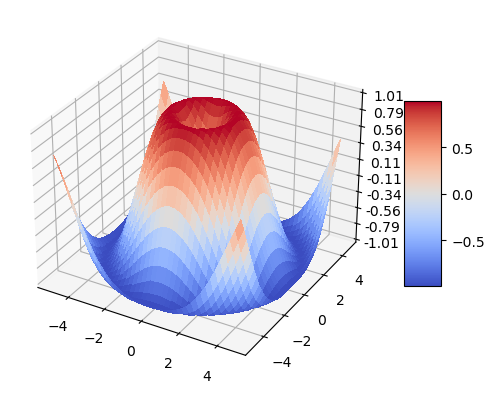

In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

In [13]:
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
X

array([[-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75],
       [-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75],
       [-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75],
       ...,
       [-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75],
       [-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75],
       [-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75]])